In [1]:
import cv2
import matplotlib.pyplot as plt
from utils import criterion, dataloader
import os
import numpy as np

# Low quality image

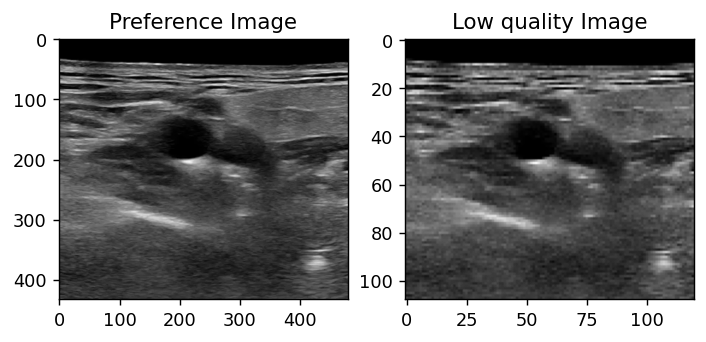

In [17]:
img_high_dir = "./data/Carotid.bmp"
img_best = plt.imread("./results/2D results/best_MLP.jpg").mean(axis=2)
# img_high = plt.imread(img_high_dir).mean(axis=2)
img_high = plt.imread(img_high_dir)
loader = dataloader.PixelLoader(img_high, N=4, batch_size=8, encoding="Sine", sine_L=6)
img_low = loader.get_low_img()

fig, ax = plt.subplots(nrows=1, ncols=2,dpi=128)
ax[0].imshow(img_high, cmap='gray')
ax[0].set_title("Preference Image")
ax[1].imshow(img_low, cmap='gray')
ax[1].set_title("Low quality Image")
plt.show()

# Interpolation

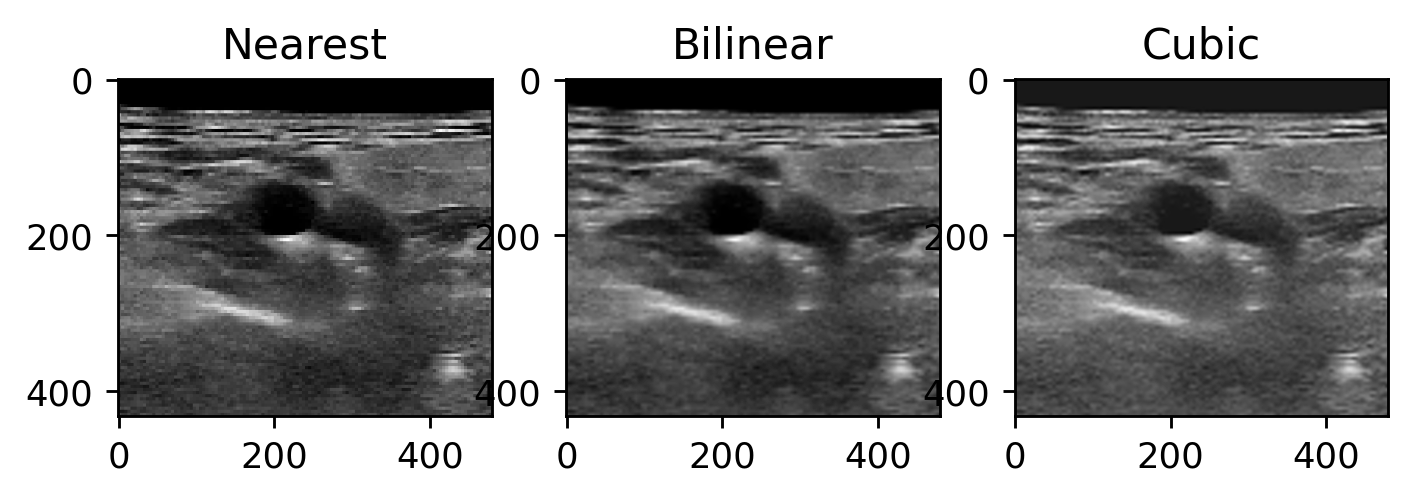

In [18]:
img_nearest = np.round(cv2.resize(img_low, (img_high.shape[1], img_high.shape[0]), interpolation=cv2.INTER_NEAREST))
img_bilinear = np.round(cv2.resize(img_low, (img_high.shape[1], img_high.shape[0]), interpolation=cv2.INTER_LINEAR))
img_bicubic = np.round(cv2.resize(img_low, (img_high.shape[1], img_high.shape[0]), interpolation=cv2.INTER_CUBIC))

fig, ax = plt.subplots(nrows=1, ncols=3,dpi=256)
ax[0].imshow(img_nearest, cmap='gray')
ax[0].set_title("Nearest")
ax[1].imshow(img_bilinear, cmap='gray')
ax[1].set_title("Bilinear")
ax[2].imshow(img_bicubic, cmap='gray')
ax[2].set_title("Cubic")
plt.show()

plt.imsave("nearest_Room.jpg", img_nearest, cmap="gray")
plt.imsave("bilinear_Room.jpg", img_bilinear, cmap="gray")
plt.imsave("bicubic_Room.jpg", img_bicubic, cmap="gray")

In [19]:
mae_nearest = criterion.mae(img_high, img_nearest)
mae_bilinear = criterion.mae(img_high, img_bilinear)
mae_bicubic = criterion.mae(img_high, img_bicubic)
mae_best = criterion.mae(img_high, img_best)
result1 = f"mae: Nearest={mae_nearest}, Bilinear={mae_bilinear}, Bicubic={mae_bicubic}, Best={mae_best}"

psnr_nearest = criterion.psnr(img_high, img_nearest)
psnr_bilinear = criterion.psnr(img_high, img_bilinear)
psnr_bicubic = criterion.psnr(img_high, img_bicubic)
psnr_best = criterion.psnr(img_high, img_best)
result2 = f"PSNR: Nearest={psnr_nearest}, Bilinear={psnr_bilinear}, Bicubic={psnr_bicubic}, Best={psnr_best}"

ssim_nearest = criterion.ssim(img_high, img_nearest, False)
ssim_bilinear = criterion.ssim(img_high, img_bilinear, False)
ssim_bicubic = criterion.ssim(img_high, img_bicubic, False)
ssim_best = criterion.ssim(img_high, img_best, False)
result3 = f"SSIM: Nearest={ssim_nearest}, Bilinear={ssim_bilinear}, Bicubic={ssim_bicubic}, Best={ssim_best}"

result = result1 + '\n' + result2 + '\n' + result3
print(result)
with open("interpolation_result_Room.txt", "w") as file:
    file.write(result)

mae: Nearest=10.583439429012346, Bilinear=9.802285879629629, Bicubic=10.442119984567901, Best=11.206717785493828
PSNR: Nearest=21.98947326704245, Bilinear=23.57858202738983, Bicubic=23.086266078817083, Best=23.935766244191594
SSIM: Nearest=0.5668802688155099, Bilinear=0.6276734891607542, Bicubic=0.6132544510513441, Best=0.7045056916593249
